In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
L=pd.read_csv("Loan_Data.csv")
L.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
L.size

7982

In [5]:
L.shape

(614, 13)

* In this dataset we have 614 rows and 13 columns

In [6]:
L.ndim

2

# Data Preprocessing

In [7]:
L.drop("Loan_ID",axis=1,inplace=True)

In [8]:
L.duplicated().sum()

0

In [9]:
L.query("Gender=='Male' and Loan_Status=='Y'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [10]:
L.query("Gender=='Female' and Loan_Status=='Y'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
49,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
582,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
587,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y


In [11]:
L.query("Gender=='Male' and Loan_Status=='N'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
18,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
591,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [12]:
L.query("Gender=='Female' and Loan_Status=='N'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
48,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
52,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
64,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
69,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N
82,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
136,Female,Yes,0,Graduate,No,4583,0.0,84.0,360.0,1.0,Rural,N
148,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
166,Female,Yes,0,Graduate,No,4583,0.0,112.0,360.0,1.0,Rural,N


* So, there are 339 Males and 75 Females are getting loan.
* Count of Male applicants are morethan Female applicants.

In [13]:
L.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
L["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
L["Dependents"] = L["Dependents"].str.split('+').str[0]
L["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [16]:
L.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* We have some null values in some of the columns.

In [17]:
L["Gender"]=L["Gender"].fillna(L["Gender"].mode()[0])
L["Married"]=L["Married"].fillna(L["Married"].mode()[0])
L["Dependents"]=L["Dependents"].fillna(L["Dependents"].mode()[0])
L["Self_Employed"]=L["Self_Employed"].fillna(L["Self_Employed"].mode()[0])
L["LoanAmount"]=L["LoanAmount"].fillna(L["LoanAmount"].mean())
L["Loan_Amount_Term"]=L["Loan_Amount_Term"].fillna(L["Loan_Amount_Term"].mode()[0])
L["Credit_History"]=L["Credit_History"].fillna(L["Credit_History"].mode()[0])

In [18]:
L.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

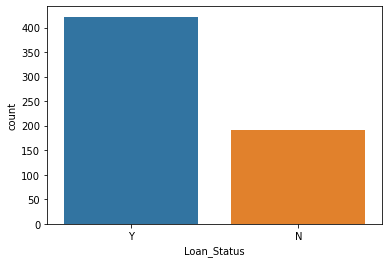

In [19]:
sns.countplot(L["Loan_Status"])

* More loans are approved vs rejected

<AxesSubplot:xlabel='LoanAmount'>

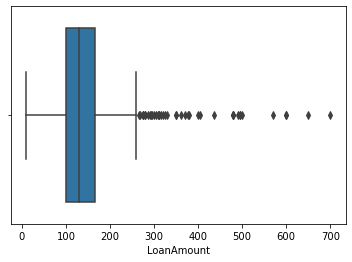

In [20]:
sns.boxplot(L["LoanAmount"])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

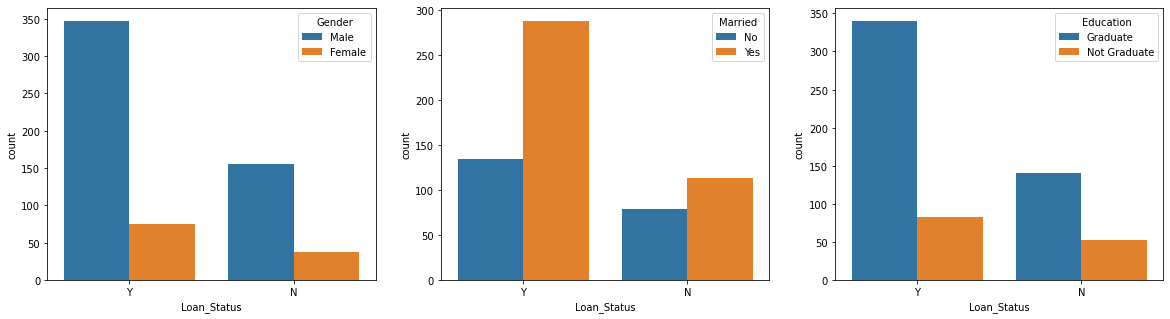

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot("Loan_Status",hue="Gender",data=L)
plt.subplot(1,3,2)
sns.countplot("Loan_Status",hue="Married",data=L)
plt.subplot(1,3,3)
sns.countplot("Loan_Status",hue="Education",data=L)

* Male applicants are getting loan morethan female applicants.
* Count of Married applicants getting loan is morethan Non-married applicants.
* Count of Graduates are getting loan morethan Non-graduates. 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

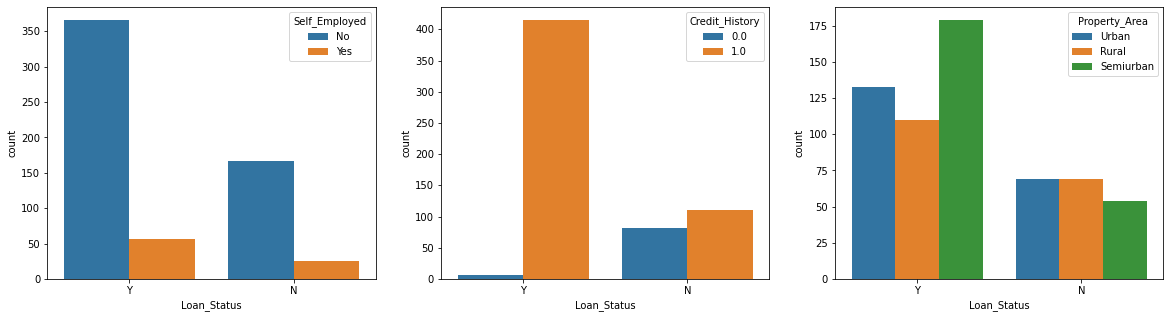

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot("Loan_Status",hue="Self_Employed",data=L)
plt.subplot(1,3,2)
sns.countplot("Loan_Status",hue="Credit_History",data=L)
plt.subplot(1,3,3)
sns.countplot("Loan_Status",hue="Property_Area",data=L)

* Selfemployed applicants are getting loan is lessthan Non-selfemployed applicants. 
* Credit history is presents for many applicants.
* Maximum properties are located in Semiurban areas.

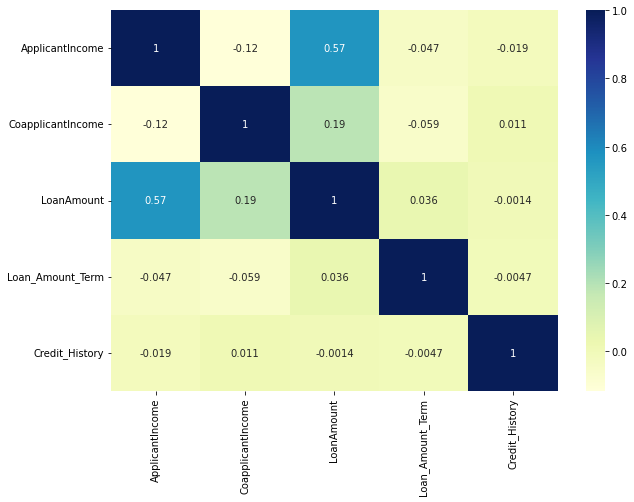

In [23]:
plt.figure(figsize = (10,7))
sns.heatmap(L.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

* Loan amount and Applicant incomes are highly correlated.

In [24]:
L["Gender"].replace(["Male","Female"],[0,1],inplace=True) 
L["Married"].replace(["Yes","No"],[0,1],inplace=True)      
L["Education"].replace(["Not Graduate","Graduate"],[0,1],inplace=True) 
L["Self_Employed"].replace(["Yes","No"],[0,1],inplace=True) 
L["Property_Area"].replace(["Urban","Rural","Semiurban"],[0,1,2],inplace=True)     
L["Loan_Status"].replace(["Y","N"],[0,1],inplace=True)

In [25]:
L.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,1,5849,0.0,146.412162,360.0,1.0,0,0
1,0,0,1,1,1,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,0,0,1,0,3000,0.0,66.000000,360.0,1.0,0,0
3,0,0,0,0,1,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,1,0,1,1,6000,0.0,141.000000,360.0,1.0,0,0


In [26]:
L["Dependents"]=L["Dependents"].astype(int)
L["CoapplicantIncome"]=L["CoapplicantIncome"].astype(int)
L["LoanAmount"]=L["LoanAmount"].astype(int)
L["Loan_Amount_Term"]=L["Loan_Amount_Term"].astype(int)
L["Credit_History"]=L["Credit_History"].astype(int)

In [27]:
L.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,1,5849,0,146,360,1,0,0
1,0,0,1,1,1,4583,1508,128,360,1,1,1
2,0,0,0,1,0,3000,0,66,360,1,0,0
3,0,0,0,0,1,2583,2358,120,360,1,0,0
4,0,1,0,1,1,6000,0,141,360,1,0,0


# Model Building

In [28]:
x=L.drop("Loan_Status",axis=1)
y=L["Loan_Status"]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.60,random_state=100)

* We split data into 60:40 ratio.

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368, 11)
(246, 11)
(368,)
(246,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [38]:
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=100)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score=cross_val_score(model,x,y,cv=5)
    print(f"{model} avg cross val score is {np.mean(score)}") 
    

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,x,y)

LogisticRegression() accuracy is 0.7967479674796748
LogisticRegression() avg cross val score is 0.7996534719445555


In [40]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model_val(model,x,y)

KNeighborsClassifier(n_neighbors=10) accuracy is 0.6666666666666666
KNeighborsClassifier(n_neighbors=10) avg cross val score is 0.6807676929228308


In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model_val(model,x,y)

DecisionTreeClassifier() accuracy is 0.7235772357723578
DecisionTreeClassifier() avg cross val score is 0.7036652005864321


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,x,y)

RandomForestClassifier() accuracy is 0.7764227642276422
RandomForestClassifier() avg cross val score is 0.7850593096094894


* Logistic Regression is best model for this dataset. 
* Because Logistic Regression give 80% Accuracy Score.